##Boyeong Hong
##HW5 Assignment 2:
###Gender Income Gap

In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}

allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [3]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix will plot each column agains each other. that is a great way to begin inspecting the data
#scatter_matrix (allmales['all'], s=30, figsize=(16, 16), diagonal='kde', alpha=0.2)

#let's see what is in the data
print allmales['all'].columns
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

###remove non real entries

In [4]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

#allmales

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)


C:\Users\Boyeong\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#allfemales

for k in allfemales:
    nonreal_f  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal_f.sum()[c]>1 and nonreal_f.sum()[c]<49:
            allfemales[k][c][~nonreal_f[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Users\Boyeong\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#print allmales['all'].head(3)

###scatter_matrix

In [7]:
#scatter_matrix will plot each column agains each other. that is a great way to begin inspecting the data
#scatter_matrix (allmales['all'], s=30, figsize=(20, 20), diagonal='kde', alpha=0.2)

#I tried plot scatter_matrix again, but there are lots of attributes so the plot looks not good.

###plot the Total Median Income

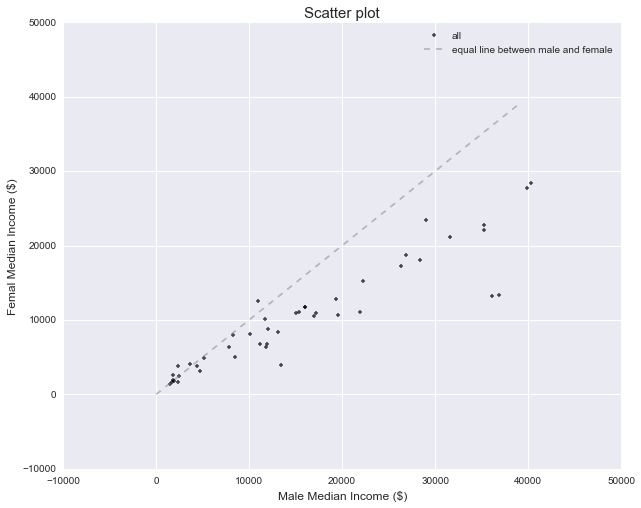

In [32]:
#plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)
pl.figure(figsize=(10,8))
pl.title('Scatter plot', fontsize=15)
pl.xlabel('Male Median Income ($)', fontsize=12)
pl.ylabel('Femal Median Income ($)', fontsize=12)
pl.xlim(-10000,50000)
pl.ylim(-10000,50000)
pl.plot(allmales['all']['Median income'], allfemales['all']['Median income'], '.', color='Black', alpha=0.7, label='all')
#pl.plot(allmales['white']['Median income'], allfemales['white']['Median income'], '.', color='Blue', alpha=0.7, label='white')
#pl.plot(allmales['black']['Median income'], allfemales['black']['Median income'], '.', color='Red', alpha=0.7, label='black')
#pl.plot(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], '.', color='Green', alpha=0.7, label='hispanic')
#pl.plot(allmales['asian']['Median income'], allfemales['asian']['Median income'], '.', color='Orange', alpha=0.7, label='asian')

x =np.arange(0., 40000., 1000)
y=x
pl.plot(x, y, '--', color='Gray', alpha=0.5, label='equal line between male and female')
#xlim=(1000,1e10), ylim=(1,1000)

pl.legend()

###Make dataset to merge median income data of all races.

In [9]:
#Make dataset
medianincomedata = pd.DataFrame({'male_all': allmales['all']['Median income'], 'male_white':allmales['white']['Median income'], 
                                 'male_black':allmales['black']['Median income'], 'hispanic_male':allmales['hispanic']['Median income'], 
                                 'male_asian':allmales['asian']['Median income'], 'female_all':allfemales['all']['Median income'], 
                                 'female_white':allfemales['white']['Median income'], 'female_black':allfemales['black']['Median income'],
                                'female_hispanic':allfemales['hispanic']['Median income'], 'female_asian':allfemales['asian']['Median income']})
medianincomedata.head()

,female_all,female_asian,female_black,female_hispanic,female_white,hispanic_male,male_all,male_asian,male_black,male_white
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22063,24840,20044,17762,23780,25411,35228,40153,24855,40122
2,27736,31363,25971,21261,30626,26914,39903,45926,30389,44882
3,28402,31802,26165,21411,30919,27017,40298,45950,30686,45554
4,10732,15231,10313,11020,10328,19988,19557,30916,10786,20445


###Fit to model

In [10]:
# fit to model

#all male and all female
model_all = smf.ols(formula = 'female_all ~male_all', data=medianincomedata).fit()
print model_all.summary()

#white male and white female
model_white = smf.ols(formula = 'female_white ~male_white', data=medianincomedata).fit()
print model_white.summary()

#black male and black female
model_black = smf.ols(formula = 'female_black ~male_black', data=medianincomedata).fit()
print model_black.summary()

#hispanic male and hispanic female
model_hispanic = smf.ols(formula = 'female_hispanic ~hispanic_male', data=medianincomedata).fit()
print model_hispanic.summary()

#asian male and asian female
model_asian = smf.ols(formula = 'female_asian ~male_asian', data=medianincomedata).fit()
print model_asian.summary()

                            OLS Regression Results                            
Dep. Variable:             female_all   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     269.4
Date:                Thu, 15 Oct 2015   Prob (F-statistic):           3.96e-20
Time:                        10:24:12   Log-Likelihood:                -418.51
No. Observations:                  45   AIC:                             841.0
Df Residuals:                      43   BIC:                             844.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1402.6193    680.314      2.062      0.0

### Using other method (the analytical best regression of the total median income)

In [22]:
import scipy.stats
#this is the analytical best regression line.
all_males=medianincomedata['male_all']
all_females=medianincomedata['female_all']

cor = scipy.stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

In [26]:
print model_all.params[0]
print beta1
print beta0

1402.61926642
0.558819109313
1527.2343818


###plot the line corresponding to the analytical regression to compare it with the result

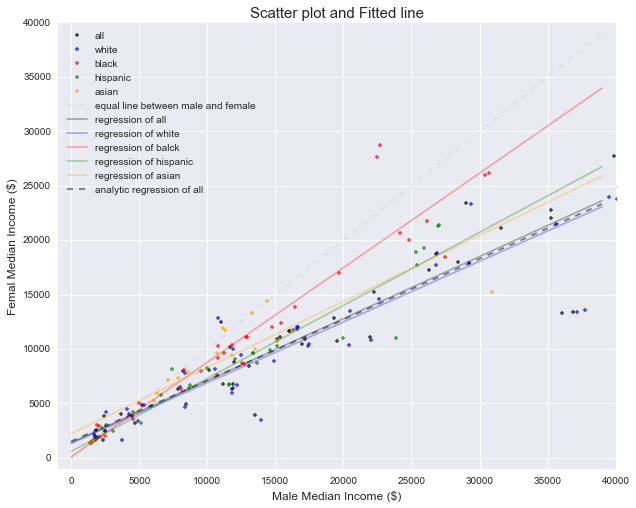

In [31]:
#plot the line corresponding to the analytical regression to compare it with the result

pl.figure(figsize=(10,8))
pl.title('Scatter plot and Fitted line', fontsize=15)
pl.xlabel('Male Median Income ($)', fontsize=12)
pl.ylabel('Femal Median Income ($)', fontsize=12)
pl.xlim(-1000,40000)
pl.ylim(-1000,40000)

pl.plot(medianincomedata['male_all'], medianincomedata['female_all'], '.', color='Black', alpha=0.7, label='all')
pl.plot(medianincomedata['male_white'], medianincomedata['female_white'], '.',  color='Blue', alpha=0.7, label='white')
pl.plot(medianincomedata['male_black'], medianincomedata['female_black'], '.', color='Red', alpha=0.7, label='black')
pl.plot(medianincomedata['hispanic_male'], medianincomedata['female_hispanic'], '.', color='Green', alpha=0.7, label='hispanic')
pl.plot(medianincomedata['male_asian'], medianincomedata['female_asian'], '.', color='Orange', alpha=0.7, label='asian')

def base_line(a, b, x):
    y=a+ b*x
    return y

x =np.arange(0, 40000., 1000)
y=x

y_all=base_line(model_all.params[0], model_all.params[1], x)
y_white=base_line(model_white.params[0], model_white.params[1], x)
y_black=base_line(model_black.params[0], model_black.params[1], x)
y_hispanic=base_line(model_hispanic.params[0], model_hispanic.params[1], x)
y_asian=base_line(model_asian.params[0], model_asian.params[1], x)
y_analytic=base_line(beta0, beta1, x)

pl.plot(x, y, '--', color='Gray', alpha=0.1, label='equal line between male and female')
pl.plot(x,y_all, color='Black', alpha=0.3, label='regression of all')
pl.plot(x,y_white, color='Blue', alpha=0.3, label='regression of white')
pl.plot(x,y_black, color='Red', alpha=0.3, label='regression of balck')
pl.plot(x,y_hispanic, color='Green', alpha=0.3, label='regression of hispanic')
pl.plot(x,y_asian, color='Orange', alpha=0.3, label='regression of asian')
pl.plot(x,y_analytic, '--',color='Black', alpha=0.5, label='analytic regression of all')

pl.legend(loc='upper left')

##Interpretation
* All female receive lower income than male.
* Relatively, the gap of income between white male and white female is lower than any other races.
* From this analytic regression model, black female earn the lowest wage in comparison men's wage in the same job position.